(141, 12)
   Variable       Mean         SD    Min    Max  Median  Range  Sample size
0  start_pr   8.845319  15.159511   0.01  69.95    1.00  69.94          141
1  total_pr  47.431915   9.113651  28.98  75.00   46.03  46.02          141


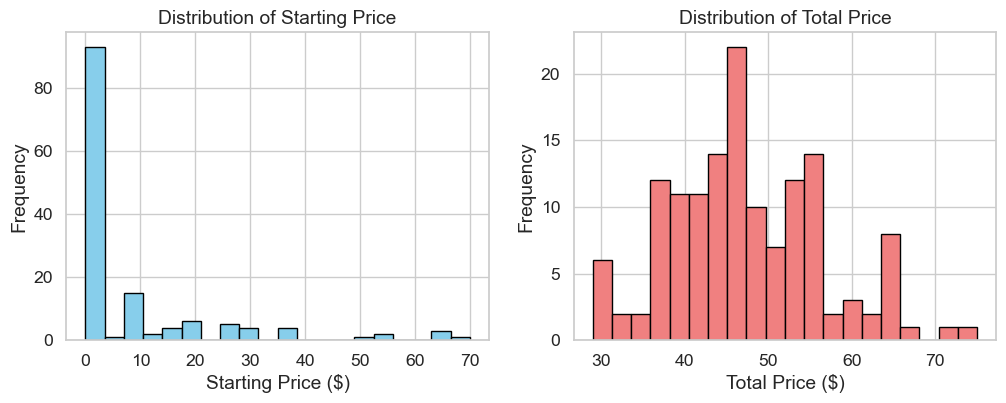

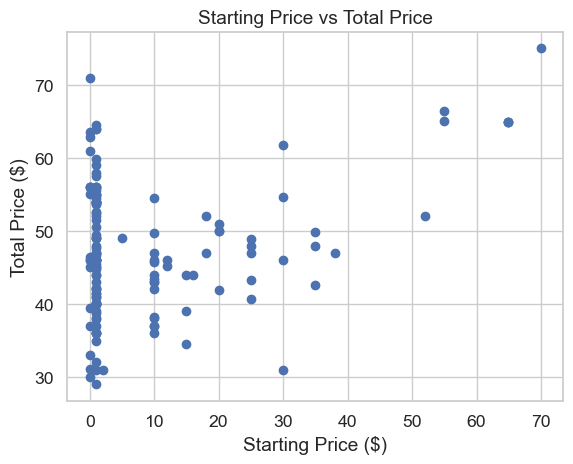

R-squared =  0.107
Regression equation: total_pr =  0.197 * start_pr +  45.69 



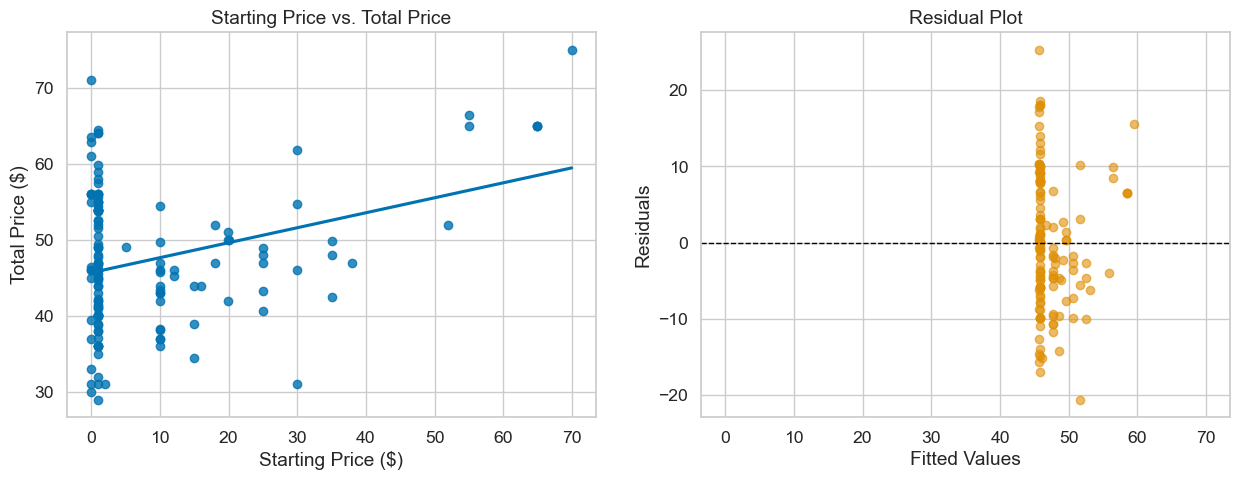

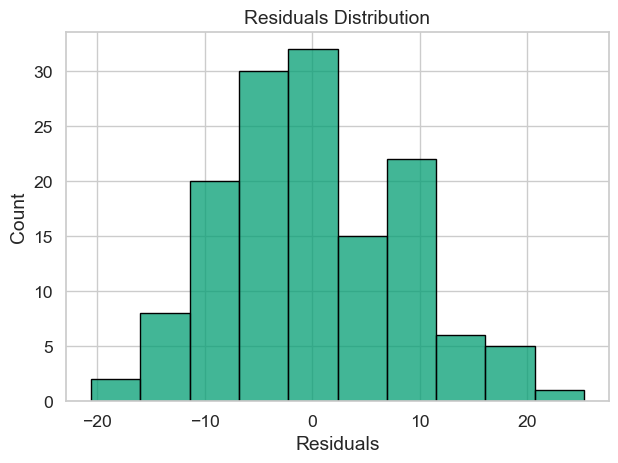

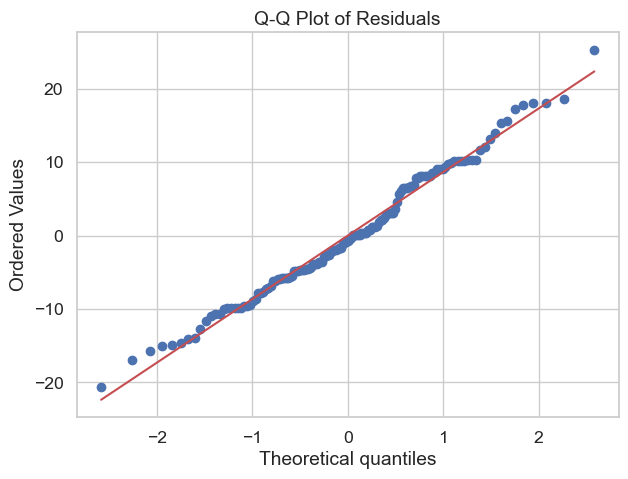

Pearson's correlation coefficient: 0.3275169272816253
H0: B1=0 There is no linear relationship between starting price and total price. The slope of the linear regression between starting price and total pirce is equal to zero.
H1: B1!=0 There is a linear relationship between starting price and total price. The slope of the linear regression between starting price and total pirce is NOT equal to zero.
Slope of the regression line: 0.197
Intercept (b0): 45.69
Standard Error: 0.048
Degrees of freedom: 139
T-test at 95% confidence interval = 1.977
Confidence Interval = [np.float64(0.102), np.float64(0.292)]
Margin of error: 0.09525904710980587
T-score: 4.087
P-value: 3.6800018939797674e-05
Significance level: 0.05
Reject H0. The slope is statistically significant.


In [11]:
# Import packages
import pandas as pd
import numpy as np
from scipy import stats
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
import statsmodels.api as statsmodels # useful stats package with regression functions
import seaborn as sns # very nice plotting package
from IPython.display import Markdown, display



# ==========================================
# 1. DATA LOADING AND CLEANING
# Load the Mario Kart Wii eBay auction dataset
df = pd.read_csv("/Users/enkh-oyun0218/anaconda_projects/b668fb25-c106-4e44-83e8-2da84cf42da0/mariokart.csv", sep=',')

# Remove two outliers that included extra items
outliers = df['total_pr'].nlargest(2).index
new_df = df.drop(outliers)

# Check final dataset structure
print (new_df.shape)
# ==========================================



# ==========================================
# 2. SUMMARY STATISTICS
# Create summary statistics table for both variables
summary_stats = {
    'Variable': ['start_pr', 'total_pr'],
    'Mean': [new_df['start_pr'].mean(), new_df['total_pr'].mean()],
    'SD': [new_df['start_pr'].std(), new_df['total_pr'].std()],
    'Min': [new_df['start_pr'].min(), new_df['total_pr'].min()],
    'Max': [new_df['start_pr'].max(), new_df['total_pr'].max()],
    'Median': [new_df['start_pr'].median(), new_df['total_pr'].median()],
    'Range': [new_df['start_pr'].max()-new_df['start_pr'].min(), new_df['total_pr'].max()-new_df['total_pr'].min()],
    'Sample size': [new_df['start_pr'].count(), new_df['total_pr'].count()],
}

summary_table = pd.DataFrame(summary_stats)
print(summary_table)

# Create histograms to visualize distributions of both variables
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))  # 1 row, 2 columns

# Histogram for starting price
ax1.hist(new_df['start_pr'], bins=20, color='skyblue', edgecolor='black')
ax1.set_xlabel('Starting Price ($)')
ax1.set_ylabel('Frequency')
ax1.set_title('Distribution of Starting Price')

# Histogram for total price
ax2.hist(new_df['total_pr'], bins=20, color='lightcoral', edgecolor='black')
ax2.set_xlabel('Total Price ($)')
ax2.set_ylabel('Frequency')
ax2.set_title('Distribution of Total Price')

plt.show()
# ==========================================



# ==========================================
# 3. CORRELATION ANALYSIS
# Assign variables for correlation calculation
x = np.array(new_df['start_pr'])
y = np.array(new_df['total_pr'])

# Calculate Pearson's correlation coefficient
r = pearsonr(x, y)[0]

# Create scatter plot to visualize relationship
plt.scatter(new_df['start_pr'], new_df['total_pr'])
plt.xlabel('Starting Price ($)')
plt.ylabel('Total Price ($)')
plt.title('Starting Price vs Total Price')
plt.show()
# ==========================================



# ==========================================
# 4. REGRESSION MODEL
# Set plot style settings
sns.set(color_codes=True, font_scale = 1.15)
sns.set_style("whitegrid")
colors = sns.color_palette('colorblind')

# Define function to create regression model and plots
def general_regression_model(data, column_x, column_y):
    
    # Fit OLS regression model
    X = statsmodels.add_constant(data[column_x])  # Add intercept term
    Y = data[column_y]
    regressionmodel = statsmodels.OLS(Y,X).fit()  # OLS = "ordinary least squares"
    
    # Extract and round regression parts
    Rsquared = round(regressionmodel.rsquared,3)
    slope = round(regressionmodel.params.iloc[1],3)
    intercept = round(regressionmodel.params.iloc[0],3)
    
    # Create two plots side by side
    fig, (ax1, ax2) = plt.subplots(ncols=2, sharex=True, figsize=(15,5))
    
    # Scatter plot with regression line
    sns.regplot(x=column_x, y=column_y, data=data, ax=ax1, color=colors[0], ci=None) 
    ax1.set_title("Starting Price vs. Total Price")
    ax1.set(ylabel="Total Price ($)")
    ax1.set(xlabel="Starting Price ($)")
    
    # Residual plot to check homoscedasticity
    fitted_values = regressionmodel.fittedvalues
    residuals = regressionmodel.resid

    ax2.scatter(fitted_values, residuals, color=colors[1], alpha=0.6)
    ax2.axhline(y=0, color='black', linestyle='--', linewidth=1)  # Reference line at y=0
    ax2.set(ylabel='Residuals')
    ax2.set(xlabel='Fitted Values')
    ax2.set_title('Residual Plot')
    
    # Create histogram of residuals to check normality
    plt.figure(figsize=(7,4.8)) 
    sns.histplot(regressionmodel.resid, kde=False, color=colors[2], edgecolor="black")
    plt.title("Residuals Distribution")
    plt.ylabel("Count")
    plt.xlabel("Residuals")
    
    # Print regression results
    print("R-squared = ",Rsquared)
    print("Regression equation: "+column_y+" = ",slope,"* "+column_x+" + ",intercept,"\n")

# Run the regression model
general_regression_model(new_df, "start_pr", "total_pr")
# ==========================================



# ==========================================
# 5. MODEL VALIDATION - Normality Check
# Regression model to extract residuals
X = statsmodels.add_constant(new_df['start_pr'])
Y = new_df['total_pr']
regressionmodel = statsmodels.OLS(Y,X).fit()

# Create Q-Q plot to check normality of residuals
fig = plt.figure(figsize=(7, 5))
ax = fig.add_subplot(111)
res = stats.probplot(regressionmodel.resid, dist="norm", plot=ax)
ax.set_title("Q-Q Plot of Residuals")
plt.show()
# ==========================================



# ==========================================
# 6. STATISTICAL INFERENCE (Confidence Interval and Hypothesis Test)
# Calculate sample statistics
x_bar = new_df['start_pr'].mean()
y_bar = new_df['total_pr'].mean()
sx = new_df['start_pr'].std()
sy = new_df['total_pr'].std()
n = new_df['start_pr'].count()

# Print correlation and hypotheses
print(f"Pearson's correlation coefficient: {r}")
print("H0: B1=0 There is no linear relationship between starting price and total price. The slope of the linear regression between starting price and total pirce is equal to zero.")
print("H1: B1!=0 There is a linear relationship between starting price and total price. The slope of the linear regression between starting price and total pirce is NOT equal to zero.")

# Calculate regression slope (b1)
b1 = r * (sy/sx)
print(f"Slope of the regression line: {round(b1, 3)}")

# Calculate intercept (b0)
b0 = y_bar - b1 * x_bar
print(f"Intercept (b0): {round(b0, 3)}")

# Calculate standard error of slope
SE = (sy/sx) * ((1 - r**2) / (n - 2))**0.5
print(f"Standard Error: {round(SE, 3)}")

# Calculate critical t-value for 95% confidence interval
t95 = stats.t.ppf(0.975, n - 2)  # Two-tailed test
print(f"Degrees of freedom: {n-2}")
print(f"T-test at 95% confidence interval = {round(t95, 3)}")

# Calculate 95% confidence interval for slope
lower_bound = b1 - t95 * SE
upper_bound = b1 + t95 * SE
print("Confidence Interval =", [round(lower_bound, 3), round(upper_bound, 3)])
print(f"Margin of error: {t95*SE}")

# Calculate t-score for hypothesis test
tscore = b1/SE
print(f"T-score: {round(tscore, 3)}")

# Calculate p-value (one-tailed) as research suggests positive correlation between starting price and total price
p = 1 - stats.t.cdf(tscore, n-2)
print(f"P-value: {p}")

# Conclusion based on significance 
print(f"Significance level: 0.05")
if p < 0.05:
    print("Reject H0. The slope is statistically significant.")
else:
    print("Fail to reject H0. The slope is not statistically significant.")
# ==========================================